#Градиентный спуск

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

In [ ]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск 

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        scalar = ((X @ w) - y)**2
        return scalar.sum()/len(scalar)
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        scalar = ((X @ w) - y)
        lenght = len(scalar)
        return (X.transpose() @ scalar) * 2/lenght
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(
    X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483.,
                                                      1199584., 1208685., 1217786., 1226887.,
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


In [ ]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                     loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    mass = [w_init.copy()]
    for i in range(n_iterations):
        gradient = lr * loss.calc_grad(X, y, mass[-1])
        mass.append(mass[-1] - gradient)
    return mass

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1,
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(
        0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

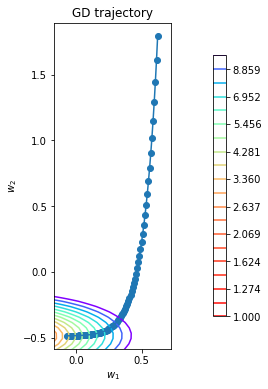

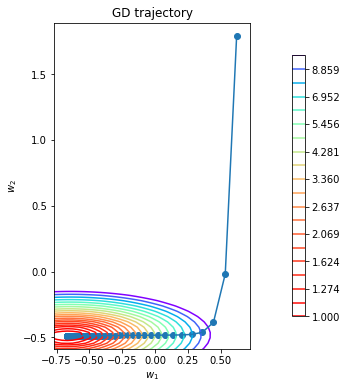

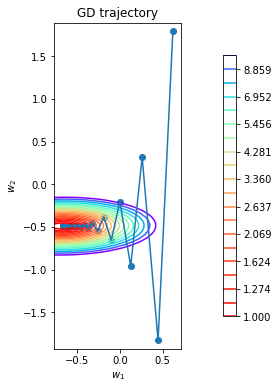

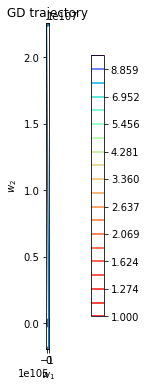

In [ ]:
lr_mass = [0.0005, 0.005, 0.01, 0.08]
for lr in lr_mass:
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss)

Теперь реализуем стохастический градиентный спуск

In [ ]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                                loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    mass = [w_init.copy()]
    for i in range(n_iterations):
        batch_indices = np.random.choice(
            X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        gradient = lr * loss.calc_grad(batch, y[batch_indices], mass[-1])
        mass.append(mass[-1] - gradient)
    return mass

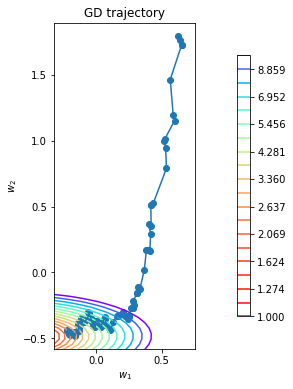

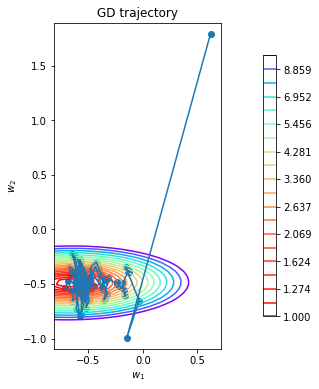

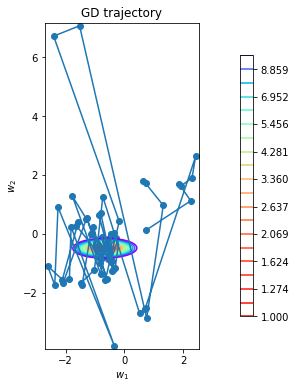

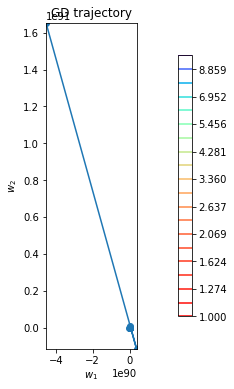

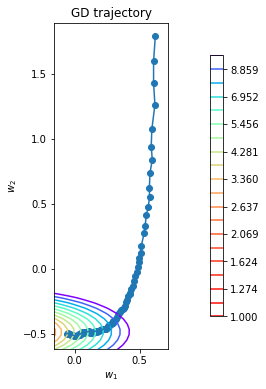

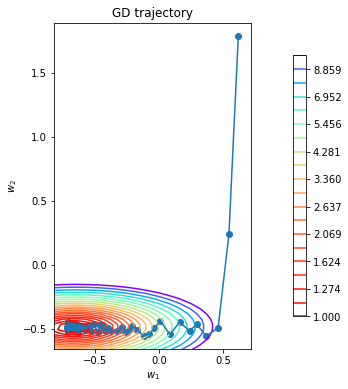

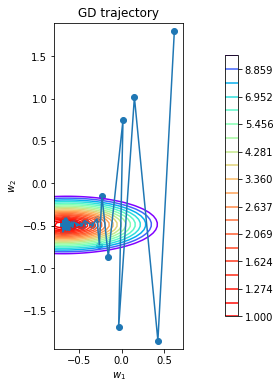

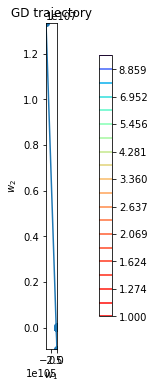

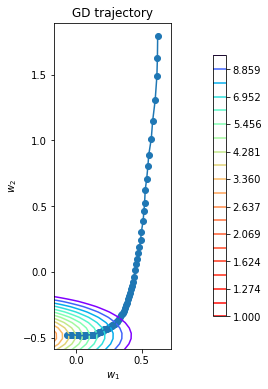

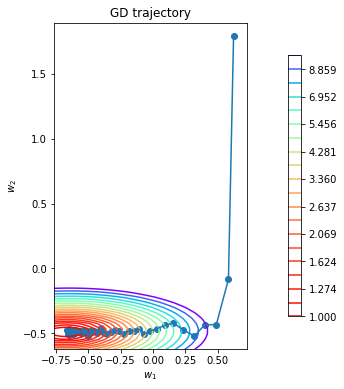

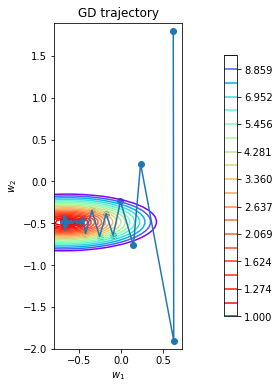

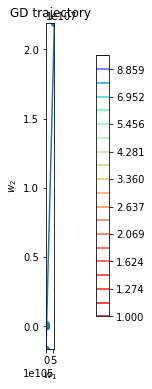

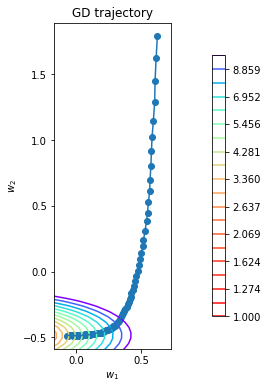

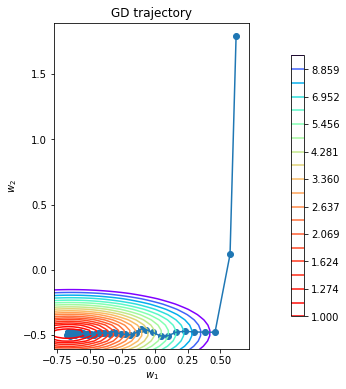

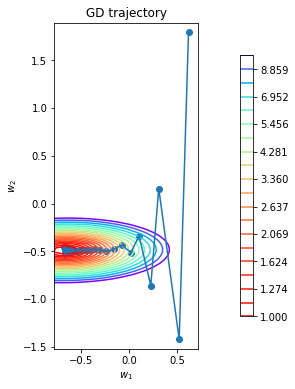

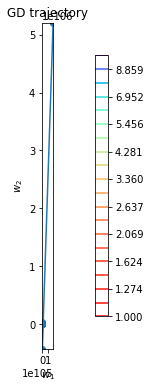

In [ ]:
bathes_mass=[1, 20, 50, 100]
for bathes in bathes_mass:
    for lr in lr_mass:
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, bathes,  100), X, y, loss)
#Чем больше значение bathes, тем стахостический спуск становится более точнее. Стахостический спуск при малых 
#значениях bathes сильно "гуляет", что приводит к неточности. 

In [ ]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                                loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s_0 = 1
    mass = [w_init.copy()]
    n_i = lr
    for i in range(n_iterations):
        batch_indices = np.random.choice(
            X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        gradient = n_i * loss.calc_grad(batch, y[batch_indices], mass[-1])
        mass.append(mass[-1] - gradient)
        n_i = n_i * (s_0/(s_0 + i))**p
    return mass

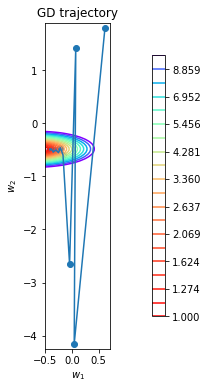

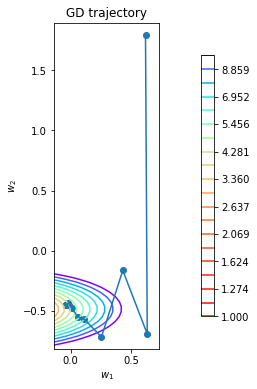

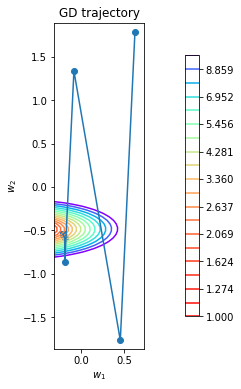

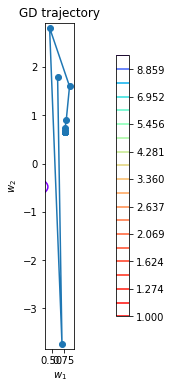

In [ ]:
mass_for_p = [0.1, 0.25, 0.5, 0.75]
lr = 0.01
for p in mass_for_p:
    plot_gd(stochastic_gradient_descent(
        w_init, X, y, loss, lr, 10, p), X, y, loss)
# Здесь можно сделать вывод такой, что чем больше значение p, то тем сильнее уменьшается шаг и это приводит к
# сильному "блужданию" стахостического градиента и вследствии чего он не успевает уменьшить ошибку.

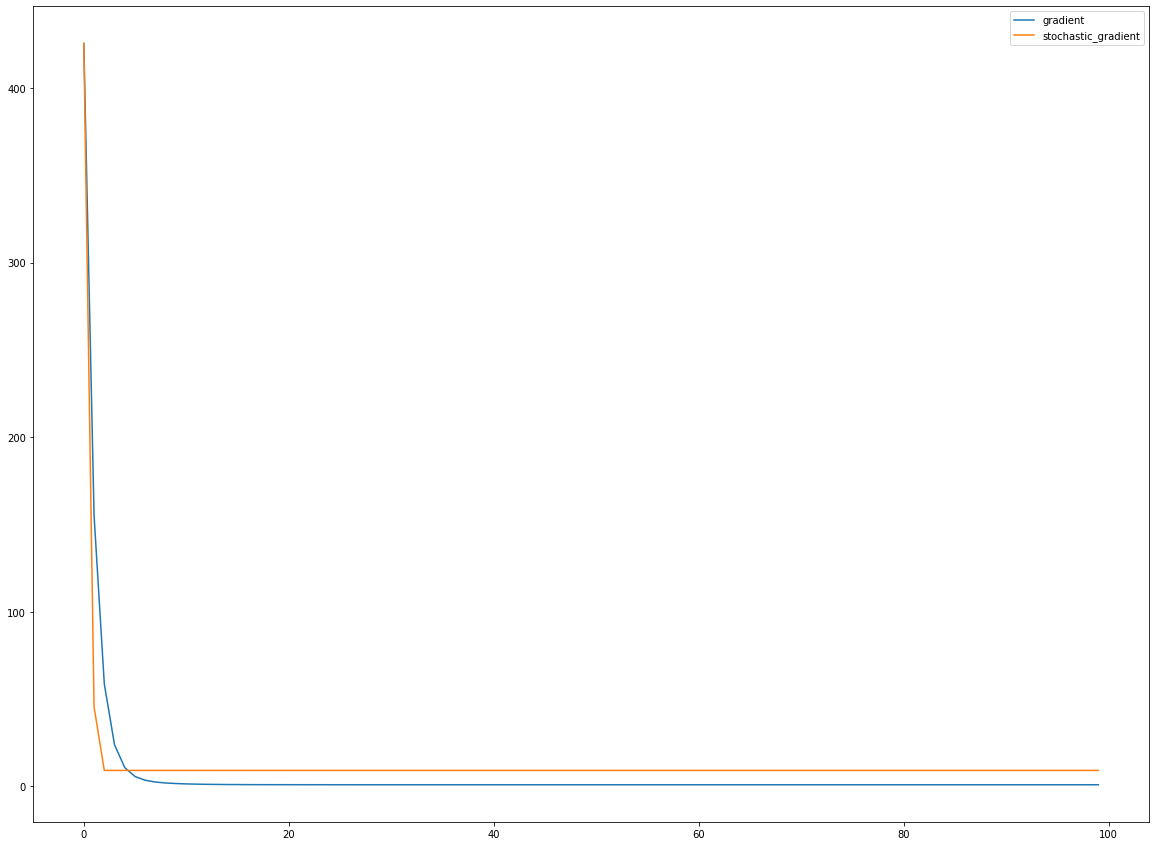

In [ ]:
loss = MSELoss()
w_list_GD = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_list_SGD = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 100)
mass_GD = []
mass_SGD = []
axis_x = np.arange((100))
fig = plt.figure(figsize=(20, 15))
for i in range(100):
    mass_GD.append(loss.calc_loss(X, y, w_list_GD[i]))
    mass_SGD.append(loss.calc_loss(X, y, w_list_SGD[i]))
ax = plt.plot(axis_x, mass_GD)
ax = plt.plot(axis_x, mass_SGD)
ax = plt.legend(['gradient', 'stochastic_gradient'])

## Часть 2. Линейная регрессия


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.arange(X.shape[1])
        w_arr = gradient_descent(w_init, X, y, self.loss, self.lr, 100)[-1]
        self.w = w_arr
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        trt = (X @ np.array(self.w))
        return trt

In [ ]:
linear_regression = LinearRegression(MSELoss(), 0.01)

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_raw.isna().sum().sum()

51

In [ ]:
from sklearn.impute import SimpleImputer
cat_features_mask = (X_raw.dtypes == "object").values

X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(
    data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)
X_dum = pd.get_dummies(X_no_mis, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X_dum, y, test_size=0.3, random_state=12345)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
linear_regression.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

print('Train: ', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('Test: ', mean_squared_error(y_test, linear_regression.predict(X_test)))

Train:  7570018.747304998
Test:  9461338.710151207


In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        w = np.delete(w, -1)
        arr = (np.dot(X, w) - y)**2 + self.coef*(((w*w).sum())**2)
        arr = array.sum() / y.shape[0]
        return arr

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        return (2 * np.dot(X.T, np.dot(X, w) - y) + 2*self.coef*w) / y.shape[0]

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1), 0.01)

In [ ]:
linear_regression.fit(X_train, y_train)
print('Train: ', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('Test: ', mean_squared_error(y_test, linear_regression.predict(X_test)))

Train:  7592032.580332027
Test:  9487124.14048315


In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        mean_count = 0
        for i in range(len(y)):
            if -self.eps < (X[i] @ w - y[i]) < self.eps:
                mean_count += np.mean_count((X[i] @ w - y[i]**2)/2)
            else:
                mean_count += np.sum(self.eps *
                                     (np.linalg(X[i] @ w - y[i]) - 0.5 * self.eps))
        mean_count = mean_count/len(y)
        return mean_count

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        mean_count = 0
        for i in range(len(y)):
            if -self.eps < X[i] @ w - y[i] < self.eps:
                mean_count += X[i] * (X[i] @ w - y[i])
            else:
                mean_count += X[i] * self.eps * np.sign(X[i] @ w - y[i])
        mean_count = mean_count/len(y)
        return mean_count

In [ ]:
linear_reg = LinearRegression(HuberLoss(100000), 0.09)
linear_reg.fit(X_train, y_train)
print('Train HuberLoss: ', mean_squared_error(
    y_train, linear_reg.predict(X_train)))
print('Test HuberLoss: ', mean_squared_error(
    y_test, linear_reg.predict(X_test)))

linear_hub = LinearRegression(MSELoss(), 0.01)
linear_hub.fit(X_train, y_train)
print('Train MSELoss: ', mean_squared_error(
    y_train, linear_hub.predict(X_train)))
print('Test MSELoss: ', mean_squared_error(y_test, linear_hub.predict(X_test)))

Train HuberLoss:  3002228.4712107657
Test HuberLoss:  3814315.31620803
Train MSELoss:  7570018.747304998
Test MSELoss:  9461338.710151207
